### Build and test a Nearest Neighbors classifier.

In [1]:
%run -d


%run:
 Run the named file inside IPython as a program.

Usage::

  %run [-n -i -e -G]
       [( -t [-N<N>] | -d [-b<N>] | -p [profile options] )]
       ( -m mod | file ) [args]

Parameters after the filename are passed as command-line arguments to
the program (put in sys.argv). Then, control returns to IPython's
prompt.

This is similar to running at a system prompt ``python file args``,
but with the advantage of giving you IPython's tracebacks, and of
loading all variables into your interactive namespace for further use
(unless -p is used, see below).

The file is executed in a namespace initially consisting only of
``__name__=='__main__'`` and sys.argv constructed as indicated. It thus
sees its environment as if it were being run as a stand-alone program
(except for sharing global objects such as previously imported
modules). But after execution, the IPython interactive namespace gets
updated with all variables defined in the program (except for __name__
and sys.argv). This allows 

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

Load the Iris data to use for experiments. The data include 50 observations of each of 3 types of irises (150 total). Each observation includes 4 measurements: sepal and petal width and height. The goal is to predict the iris type from these measurements.
http://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
# Load the data, which is included in sklearn.
iris = load_iris()
print(type(iris))

<class 'sklearn.datasets.base.Bunch'>


In [4]:
print ('Iris target names:', iris.target_names)
print ('Iris feature names:', iris.feature_names)
X, Y = iris.data, iris.target
print("Data is", len(X), X.shape, "\n", X, Y)
#print("Target is", len(Y), Y.shape, "\n", Y)


Iris target names: ['setosa' 'versicolor' 'virginica']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data is 150 (150, 4) 
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1

In [5]:
# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]
print("Shuffled Data is", len(X), X.shape, X)
print("Shuffled Target is", len(Y), Y.shape, Y)

# Split into train and test.
partition = int(np.round(len(X) * 0.050))
print("Partition is", partition)
train_data, train_labels = X[:partition], Y[:partition]
test_data, test_labels = X[partition:], Y[partition:]
print("Length of Training data is : ", len(train_data))
print("Length of Test data is : ", len(test_data))

Shuffled Data is 150 (150, 4) [[ 5.8  2.8  5.1  2.4]
 [ 6.   2.2  4.   1. ]
 [ 5.5  4.2  1.4  0.2]
 [ 7.3  2.9  6.3  1.8]
 [ 5.   3.4  1.5  0.2]
 [ 6.3  3.3  6.   2.5]
 [ 5.   3.5  1.3  0.3]
 [ 6.7  3.1  4.7  1.5]
 [ 6.8  2.8  4.8  1.4]
 [ 6.1  2.8  4.   1.3]
 [ 6.1  2.6  5.6  1.4]
 [ 6.4  3.2  4.5  1.5]
 [ 6.1  2.8  4.7  1.2]
 [ 6.5  2.8  4.6  1.5]
 [ 6.1  2.9  4.7  1.4]
 [ 4.9  3.1  1.5  0.1]
 [ 6.   2.9  4.5  1.5]
 [ 5.5  2.6  4.4  1.2]
 [ 4.8  3.   1.4  0.3]
 [ 5.4  3.9  1.3  0.4]
 [ 5.6  2.8  4.9  2. ]
 [ 5.6  3.   4.5  1.5]
 [ 4.8  3.4  1.9  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 6.2  2.8  4.8  1.8]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.8  1.9  0.4]
 [ 6.2  2.9  4.3  1.3]
 [ 5.   2.3  3.3  1. ]
 [ 5.   3.4  1.6  0.4]
 [ 6.4  3.1  5.5  1.8]
 [ 5.4  3.   4.5  1.5]
 [ 5.2  3.5  1.5  0.2]
 [ 6.1  3.   4.9  1.8]
 [ 6.4  2.8  5.6  2.2]
 [ 5.2  2.7  3.9  1.4]
 [ 5.7  3.8  1.7  0.3]
 [ 6.   2.7  5.1  1.6]
 [ 5.9  3.   4.2  1.5]
 [ 5.8  2.6  4.   1.2]
 [ 6.8  3.   5.5  2.1]
 [ 4.7  3.2  1.3  0.2]
 [ 6

Create a distance function that returns the distance between 2 observations.

In [6]:
def EuclideanDistance(v1, v2):
    sum = 0.0
    for index in range(len(v1)):
        sum += (v1[index] - v2[index]) ** 2
    return sum ** 0.5

Just for fun, let's compute all the pairwise distances in the training data and plot a histogram.

In [7]:
print(range(len(train_data) - 1))
#print(range(i + 1, len(train_data)))

range(0, 7)


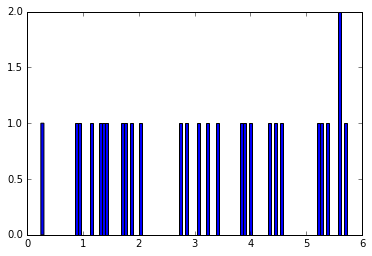

In [8]:
dists = []
for i in range(len(train_data) - 1):
    for j in range(i + 1, len(train_data)):
        dist = EuclideanDistance(train_data[i], train_data[j])
        dists.append(dist)
        
fig = plt.hist(dists, 100)

Ok now let's create a class that implements a Nearest Neighbors classifier. We'll model it after the sklearn classifier implementations, with fit() and predict() methods.
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [9]:
class NearestNeighbors:
    # Initialize an instance of the class.
    def __init__(self, metric=EuclideanDistance):
        self.metric = metric
    
    # No training for Nearest Neighbors. Just store the data.
    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels
    
    # Make predictions for each test example and return results.
    def predict(self, test_data):
        results = []
        for item in test_data:
            results.append(self._predict_item(item))
        return results
    
    # Private function for making a single prediction.
    def _predict_item(self, item):
        best_dist, best_label = 1.0e10, None
        for i in range(len(self.train_data)):
            dist = self.metric(self.train_data[i], item)
            if dist < best_dist:
                best_label = self.train_labels[i]
                best_dist = dist
        return best_label

Run an experiment with the classifier.

In [10]:
clf = NearestNeighbors()
clf.fit(train_data, train_labels)
preds = clf.predict(test_data)

correct, total = 0, 0
for pred, label in zip(preds, test_labels):
    if pred == label: correct += 1
    total += 1
print ('total: %3d  correct: %3d  accuracy: %3.2f' %(total, correct, 1.0*correct/total))

total: 142  correct: 129  accuracy: 0.91
